# Distribuciones en forma de anillo

In [4]:
from math import sin, cos, radians, pi, sqrt
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [5]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

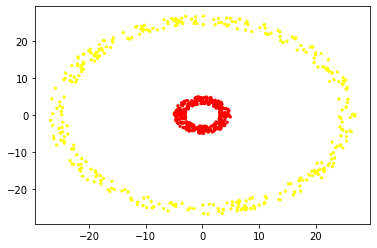

In [6]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0], data[:,1], c=labels, s=5, cmap = 'autumn')

# Algoritmo con Kmeans

In [7]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(2).fit(data)

In [10]:
clust = km.predict(data)

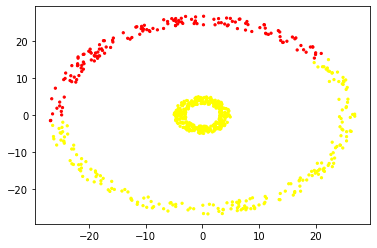

In [11]:
plt.scatter(data[:, 0], data[:, 1], c = clust, s=5, cmap = 'autumn')

## Algoritmos de los K Medoides

In [14]:
from pyclust import KMedoids

In [16]:
kmed = KMedoids(2).fit_predict(data)

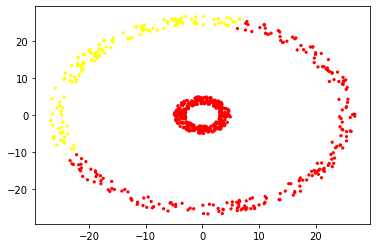

In [17]:
plt.scatter(data[:, 0], data[:, 1], c=kmed, s=5, cmap='autumn')

## Algoritmo del Clustering Espectral

In [18]:
from sklearn.cluster import SpectralClustering

In [19]:
clust = SpectralClustering(2).fit_predict(data)

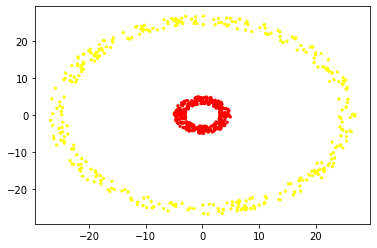

In [20]:
plt.scatter(data[:, 0], data[:, 1], c=clust, s=5, cmap='autumn')

# Resumen Clusters

* Si no puedo estimar una K, podríamos utilizar **propagación de la afinidad**
* Podemos basarnos en que la distancia euclidia pueda funcionar? Sí, usamos **KMeans**
* Podemos basarnos en los valores que están más al medio? **KMedoides**
* Existe al menos una forma de separarlos con una recta? Podríamos usar **support vector machine**
* En el caso que no se puedan separar linealmente, se podría con **support vector machine** o **clustering espectral**

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral